In [1]:
cd csc478\newsgroups

C:\Users\Shawn\csc478\newsgroups


In [2]:
import numpy as np
import pylab as pl
from numpy import *
import operator
import matplotlib.pyplot as plt

In [3]:
# Star of question a. 
# Create your own KNN classifier. Your classifier should allow as input the training data matrix, the training labels, 
# the instance to be classified, the value of K, and should return the predicted class for the instance and the top K
# neighbors. Your classifier should work with Euclidean distance as well as Cosine Similarity (see class examples).
# You may create two separate classifiers, or add this capability as a parameter for the classifier function.
def classify(inX, dataSet, labels, k, distance):
    if distance == 'Euclidean':
        dataSetSize = dataSet.shape[0]
        diffMat = tile(inX, (dataSetSize,1)) - dataSet
        sqDiffMat = diffMat**2
        sqDistances = sqDiffMat.sum(axis=1)
        distances = sqDistances**0.5
    elif distance == 'Cosine':
        D_norm = array([linalg.norm(dataSet[i]) for i in range(len(dataSet))])
        x_norm = linalg.norm(inX)
        sims = dot(dataSet,inX)/(D_norm * x_norm)
        distances = 1 - sims
    else:
        return '', 0
    idx = np.argsort(distances)
    classCount={}
    for i in range(k):
        votelabel = labels[idx[i]]
        classCount[votelabel] = classCount.get(votelabel,0) + 1
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0], idx[0:k]

In [5]:
# End of question a.

# Start of question b.
# Create a function to compute the classification accuracy over the test data set (ratio of correct predictions to
# the number of test instances). This function will call the classifier function on all the test instances and in
# each case compares the actual test class label to the predicted class label.
def accuracy(testDataSet, testLabelsSet, trainDataSet, trainLabelsSet, k, distance):
    crctNum = 0.0
    for idx in range(testDataSet.shape[0]):
        label, topK = classify(testDataSet[idx], trainDataSet, trainLabelsSet, k, distance)
        if(label == testLabelsSet[idx]):
            crctNum += 1.0
    return crctNum/testDataSet.shape[0]

In [6]:
# End of question b.

# Start of question c.
# Run your accuracy function on a range of values for K in order to compare accuracy values for different numbers of
# neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. [For example, you can try
# evaluating your classifiers on a range of values of K from 1 through 20 and present the results as a table or a graph].

# Load data
termsData = np.genfromtxt("modifiedterms.txt", delimiter="\t", dtype=None)
label = ['Windows', 'Hockey']
 
trainData = np.genfromtxt("trainMatrixModified.txt", delimiter="\t", dtype=None).T
trainClasses = np.genfromtxt("trainClasses.txt", delimiter="\t", dtype=None)
trainLabels = np.array([label[i] for i in trainClasses[:,1]])
 
testData = np.genfromtxt("testMatrixModified.txt", delimiter="\t", dtype=None).T
testClasses = np.genfromtxt("testClasses.txt", delimiter="\t", dtype=None)
testLabels = np.array([label[i] for i in testClasses[:,1]])

print trainData.shape, testData.shape

(800L, 5500L) (200L, 5500L)


In [7]:
accuEuclidean = [accuracy(testData, testLabels, trainData, trainLabels, k, 'Euclidean') for k in range(1,21)]
accuCosine = [accuracy(testData, testLabels, trainData, trainLabels, k, 'Cosine') for k in range(1, 21)]

print accuEuclidean
print accuCosine

[0.78, 0.785, 0.81, 0.77, 0.815, 0.745, 0.765, 0.73, 0.75, 0.705, 0.795, 0.725, 0.775, 0.74, 0.785, 0.73, 0.76, 0.725, 0.74, 0.71]
[0.985, 0.96, 0.97, 0.965, 0.97, 0.98, 0.98, 0.97, 0.975, 0.975, 0.98, 0.97, 0.98, 0.97, 0.985, 0.975, 0.975, 0.975, 0.975, 0.975]


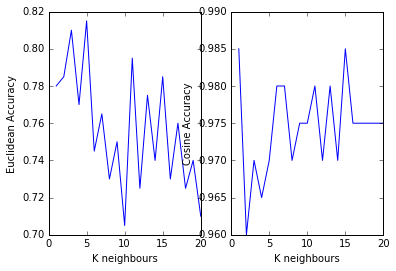

In [14]:
%matplotlib inline
X = np.array(range(1,21))
plt.subplot(121)
plt.plot(X, np.array((accuEuclidean)))
plt.xlabel('K neighbours')
plt.ylabel('Euclidean Accuracy')
plt.subplot(122)
plt.plot(X, np.array((accuCosine)))
plt.xlabel('K neighbours')
plt.ylabel('Cosine Accuracy')
plt.show()

In [15]:
# End of question c.

# Start of question d.
# Using Python, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of
# raw term frequencies). [See class notes on Text Categorization]. Then, rerun your evaluation on the range of K values
# (as above) and compare the results to the results without using TFxIDF weights.

trainData2 = np.genfromtxt("trainMatrixModified.txt", delimiter="\t", dtype=None)
testData2 = np.genfromtxt("testMatrixModified.txt", delimiter="\t", dtype=None)

terms = np.shape(trainData)[0]
DF = array([(trainData2 != 0).sum(1)]).T
N = np.shape(trainData2)[1]
NMatrix = np.ones(np.shape(trainData2), dtype = float) * N
NMatrix

array([[ 800.,  800.,  800., ...,  800.,  800.,  800.],
       [ 800.,  800.,  800., ...,  800.,  800.,  800.],
       [ 800.,  800.,  800., ...,  800.,  800.,  800.],
       ..., 
       [ 800.,  800.,  800., ...,  800.,  800.,  800.],
       [ 800.,  800.,  800., ...,  800.,  800.,  800.],
       [ 800.,  800.,  800., ...,  800.,  800.,  800.]])

In [16]:
# Compute IDF using train set
IDF = np.log(np.divide(NMatrix, DF))
tfidfTrain = np.zeros(np.shape(IDF), dtype = float)
tfidfTest = np.zeros(np.shape(testData2), dtype = float)
# Apply IDF on train set
np.multiply(IDF, trainData2, tfidfTrain)
# Apply IDF on test set
np.multiply(IDF[:,:200], testData2, tfidfTest)


array([[ 0.        ,  0.        ,  2.77258872, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

[0.78, 0.785, 0.81, 0.77, 0.815, 0.745, 0.765, 0.73, 0.75, 0.705, 0.795, 0.725, 0.775, 0.74, 0.785, 0.73, 0.76, 0.725, 0.74, 0.71]
[0.985, 0.96, 0.97, 0.965, 0.97, 0.98, 0.98, 0.97, 0.975, 0.975, 0.98, 0.97, 0.98, 0.97, 0.985, 0.975, 0.975, 0.975, 0.975, 0.975]


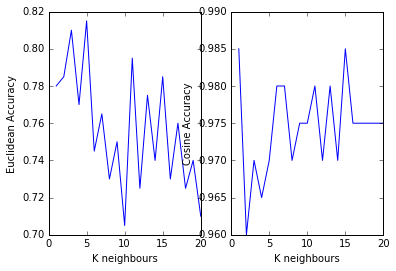

In [18]:
# Re-run step a b c
# Re-run step a b c
accuEuclidean = [accuracy(testData2.T, testLabels, trainData2.T, trainLabels, k, 'Euclidean') for k in range(1,21)]
accuCosine = [accuracy(testData2.T, testLabels, trainData2.T, trainLabels, k, 'Cosine') for k in range(1, 21)]
 
print accuEuclidean
print accuCosine
 
#Show the result
X = np.array(range(1,21))
plt.subplot(121)
plt.plot(X, np.array((accuEuclidean)))
plt.xlabel('K neighbours')
plt.ylabel('Euclidean Accuracy')
plt.subplot(122)
plt.plot(X, np.array((accuCosine)))
plt.xlabel('K neighbours')
plt.ylabel('Cosine Accuracy')
plt.show()

In [52]:
# Observation:
# Euclidean approach reachs the highest accuracy in k = 5, while Cosine approach reachs the highest accuracy in k = 1 and 15.
# Cosine Similarity has generally higher accuracy than Euclidean distance. 
# By converting to tf-idf, the highest accuracy of Euclidean distance increased up to 0.815 when k = 5, the highest accuracy
# of Cosine similarity increased up to 0.985.
# End of question d.

# Start of question e.
# Create a classifier based on the Rocchio Method adapted for text categorization. Your classifier should take as input the
# training data matrix, the training labels, and the instance to be classified. It should compute the prototype vectors for
# each of the categories and measure Cosine similarity of the test instance to each prototype. Your output should indicate
# the predicted class and include the similarity values of the instance to each of the category prototypes. Finally, compute
# the classification accuracy using the test instances and compare your results to the best KNN approach you tried earlier.

def Rocchio_classifier(inX, dataSet, labels):
    classes = list(set(labels))
    
    proto_vecs = [np.zeros(dataSet.shape[1]) for i in range(len(classes))]

    for i in range(len(dataSet)):
        proto_vecs[int(labels[i])] += dataSet[i]

    maxSim = float(-2)
    c = None
    x_norm = np.linalg.norm(inX)
    for i in range(len(classes)):
        d_norm = np.linalg.norm(proto_vecs[i])
        sim = np.dot(proto_vecs[i], inX) / (d_norm * x_norm)
        if np.all(sim > maxSim):
            maxSim = sim
            c = classes[i]
    return [c, maxSim]

def accuracy2(testDataSet, testLabelsSet, trainDataSet, trainLabelsSet):
    crctNum = 0.0
    for i in range(len(testDataSet)):
        result = Rocchio_classifier(testDataSet[i], trainDataSet, trainLabelsSet)[0]
        if (result == testLabelsSet[i]):
            crctNum += 1.0
    return crctNum / testDataSet.shape[0]

In [53]:
accuracy2(testData2.T, testClasses[:,1], trainData2.T, trainClasses[:,1])

0.975

In [54]:
# The highest accuracy of Euclidean distance is 0.815, and the highest accuracy of Cosine similarity is 0.985.
# The accuracy of Rocchio_classifier is 0.975. But this algorithm runs much faster than kNN's which need to try
# each k from 1 to 20.

# End of question e.